In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
df = pd.read_csv('datasets_13720_18513_insurance(1).csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Business Case:**<br>
    To predict the insurance cost based on the provided features.

**Domain Analysis:**<br>
    * age: Age of the primary beneficiary.<br>
    * sex: Gender of the beneficiary- female/male.<br>
    * bmi: Body mass index, providing an understanding of body. Weights that are relatively high or low relative to height.<br>Objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.<br>
    * children: Number of children covered by health insurance / Number of dependents.<br>
    * smoker: Is the person a smoker or non-smoker.<br>
    * region: The beneficiary's residential area in the US - northeast, southeast, southwest, northwest.<br>
    * charges: Individual medical costs billed by health insurance.


**Basic checks**

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**EDA**

In [12]:
# Univariate analysis
ins_report = sv.analyze(df)
ins_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Data Insights:<br>
    * More than 16% of people avail the health insurance at the age of 20.<br>
    * 51% of Male and 49% of Female category have availed insurance.<br>
    * BMI almost has a normal distribution.<br>
    * More than 40% of people who availed insurance have 0 Children.<br>
    * Almost 80% of beneficiaries are non smokers.<br>
    * Most of the beneficiaries belong to Southeast region.

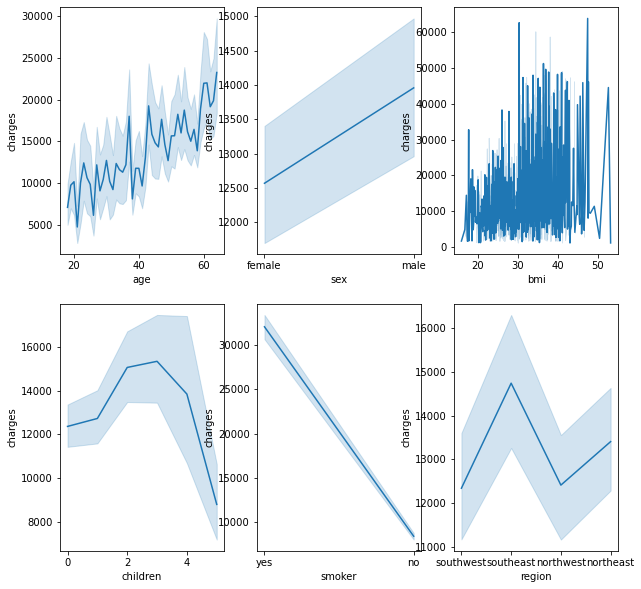

In [10]:
# Bivariate analysis
plt.figure(figsize=(10,10))
pltnum = 1

data = df.drop('charges',axis=1)
for i in data:
    if pltnum<=6:
        plt.subplot(2,3,pltnum)
        sns.lineplot(y=df.charges,x=data[i])
    pltnum+=1
plt.show()

Data Insights:<br>
    * As age increases, insurance charges also increases proportionally.<br>
    * Higher BMI results in higher insurance cost.<br>
    * With increase in number of dependents(children) upto 4, the insurance cost also increases. But after 4 there is sudden dip in the cost.<br>
    * Smokers tend to pay more insurance charges when compared to non smokers.<br>
    * South-East region has higher rate of charges when compared to other regions.

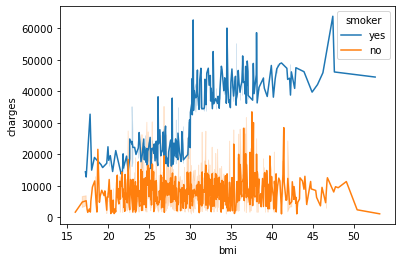

In [11]:
# Multivariate analysis
sns.lineplot(x='bmi',y='charges',data=df,hue='smoker')
plt.show()

Data Insight: Increase in BMI of people who smoke leads to higher charges when compared to non smoker with higher BMI.

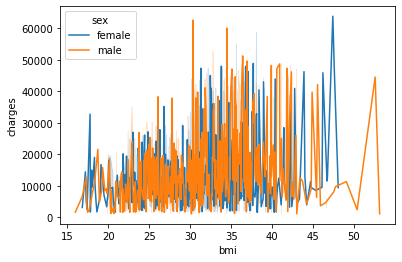

In [12]:
sns.lineplot(x='bmi',y='charges',data=df,hue='sex')
plt.show()

Data Insight: Higher BMI in Male leads to higher insurance charges

**Data Preprocessing**

In [13]:
# Checking for missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values/missing data.

In [14]:
# Converting categorical features into numerical data
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df.sex = lb.fit_transform(df.sex)
df.smoker = lb.fit_transform(df.smoker)
df.region = lb.fit_transform(df.region)

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


All categorical features are handled/converted to numerical.

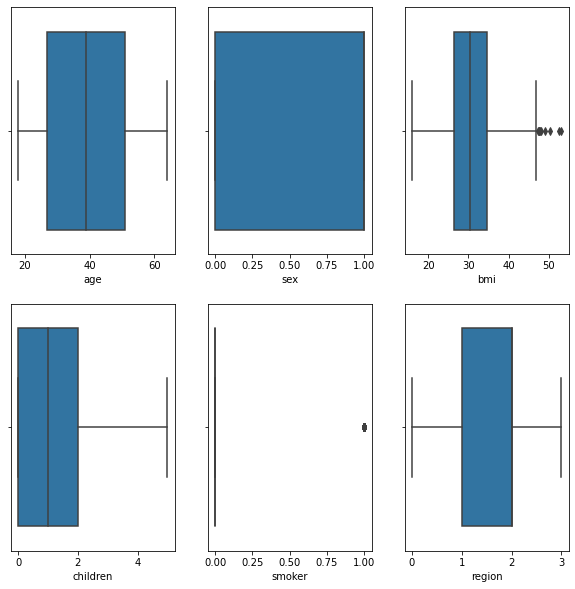

In [17]:
# Checking for outliers
plt.figure(figsize=(10,10))
pltnum_o = 1

for i in df:
    if pltnum_o<=6:
        plt.subplot(2,3,pltnum_o)
        sns.boxplot(x=df[i])
    pltnum_o+=1
plt.show()

Ignoring the outlier of discrete feature - smoker, we have outliers to be handled in bmi.

In [18]:
# Using IQR to remove outliers
from scipy import stats

IQR = stats.iqr(df.bmi)
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)

maxlimit = Q3+1.5*IQR
minlimit = Q1-1.5*IQR

In [19]:
print(len(df.loc[df.bmi>maxlimit]))
print(len(df.loc[df.bmi<minlimit]))

9
0


In [20]:
9/1338*100

0.672645739910314

In [21]:
df.loc[df.bmi>maxlimit,'bmi'] = df.bmi.mean() 

In [22]:
print(len(df.loc[df.bmi>maxlimit]))

0


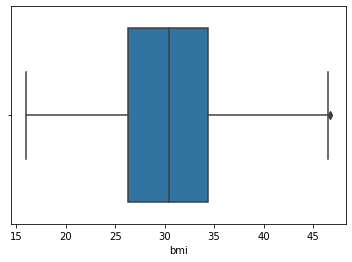

In [23]:
sns.boxplot(df.bmi)
plt.show()

All outliers are now successfully handled.

**Feature Selection**

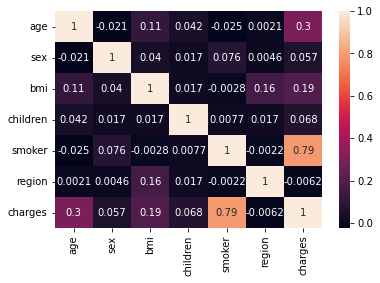

In [24]:
# Checking for correlation
sns.heatmap(df.corr(),annot = True)
plt.show()

There is no high correlation between any features

In [25]:
# Checking for Constant columns
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.538195,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,5.899997,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.430000,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,63770.428010


There are no constant columns

In [26]:
# Checking for duplicate rows
df.duplicated().sum()

1

In [27]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Duplicate rows are removed

**Model Building**

In [28]:
# Identifying dependent and independent features
x = df.drop('charges',axis=1)
y = df.charges

In [29]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [30]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=38)

In [31]:
# Using Linear regression algorithm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

lr = LinearRegression()
lr.fit(x_train,y_train)

y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)

# Model Evaluation
train_acc_r2 = r2_score(y_train,y_train_pred_lr)
test_acc_r2 = r2_score(y_test,y_test_pred_lr)
print("The training R2 accuracy using Linear Regression is:",train_acc_r2*100)
print("The testing R2 accuracy using Linear Regression is:",test_acc_r2*100)

# Checking for MSE and RMSE
mse = mean_squared_error(y_test,y_test_pred_lr)
print("MSE of test data is:", mse)
print("RMSE of test data is:", np.sqrt(mse))

# Checking for MAE
print("MAE is: ",mean_absolute_error(y_test,y_test_pred_lr))

The training R2 accuracy using Linear Regression is: 75.26357583687063
The testing R2 accuracy using Linear Regression is: 72.92819839615674
MSE of test data is: 33598191.876369886
RMSE of test data is: 5796.394730896946
MAE is:  4089.605597935631


In [32]:
# Checking for Cross-validation score
from sklearn.model_selection import cross_val_score

score_lr = cross_val_score(lr,x,y,cv=3,scoring='r2')
print(score_lr)
print("Cross validation score is:",score_lr.mean())

[0.75182082 0.75007066 0.727293  ]
Cross validation score is: 0.7430614901933787


In [33]:
# Using SVM's Regressor algorithm
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)

y_train_pred_svr = svr.predict(x_train)
y_test_pred_svr = svr.predict(x_test)

# Model evaluation
train_acc_r2_svr = r2_score(y_train,y_train_pred_svr)
test_acc_r2_svr = r2_score(y_test,y_test_pred_svr)
print("The training R2 accuracy using SVR is:",train_acc_r2_svr*100)
print("The testing R2 accuracy using SVR is:",test_acc_r2_svr*100)

The training R2 accuracy using SVR is: -10.644490522903038
The testing R2 accuracy using SVR is: -9.57901599092692


In [34]:
# Checking for cross validation score
score_svr = cross_val_score(svr,x,y,cv=3,scoring='r2')
print(score_svr)
print("Cross validation score is:",score_svr.mean())

[-0.12236171 -0.07442305 -0.11506134]
Cross validation score is: -0.10394869997295501


In [35]:
# Using Decision Tree algorithm
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor()
dr.fit(x_train,y_train)

y_train_pred_dr = dr.predict(x_train)
y_test_pred_dr = dr.predict(x_test)

# Model evaluation
train_acc_r2_dr = r2_score(y_train,y_train_pred_dr)
test_acc_r2_dr = r2_score(y_test,y_test_pred_dr)
print("The training R2 accuracy using Decision tree is:",train_acc_r2_dr*100)
print("The testing R2 accuracy using Decision tree is:",test_acc_r2_dr*100)

The training R2 accuracy using Decision tree is: 100.0
The testing R2 accuracy using Decision tree is: 72.01770980005637


In [36]:
# Checking for cross validation score
score_dr = cross_val_score(dr,x,y,cv=3,scoring='r2')
print(score_dr)
print("Cross validation score is:",score_dr.mean())

[0.70540579 0.69560063 0.67834983]
Cross validation score is: 0.6931187509381859


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

y_train_pred_gb = gb.predict(x_train)
y_test_pred_gb = gb.predict(x_test)

# Model evaluation
train_acc_r2_gb = r2_score(y_train,y_train_pred_gb)
test_acc_r2_gb = r2_score(y_test,y_test_pred_gb)
print("The training R2 accuracy using Gradient Boosting is:",train_acc_r2_gb*100)
print("The testing R2 accuracy using Gradient Boosting is:",test_acc_r2_gb*100)

The training R2 accuracy using Gradient Boosting is: 90.57251132326401
The testing R2 accuracy using Gradient Boosting is: 84.94358597394319


In [38]:
# Checking for cross validation score
score_gb = cross_val_score(gb,x,y,cv=3,scoring='r2')
print(score_gb)
print("Cross validation score is:",score_gb.mean())

[0.86139864 0.85051474 0.84204546]
Cross validation score is: 0.8513196156556927


In [39]:
# Using Random Forest algorithm
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

# Model evaluation
train_acc_r2_rf = r2_score(y_train,y_train_pred_rf)
test_acc_r2_rf = r2_score(y_test,y_test_pred_rf)
print("The training R2 accuracy using Random forest is:", train_acc_r2_rf*100)
print("The testing R2 accuracy using Random forest is:", test_acc_r2_rf*100)

The training R2 accuracy using Random forest is: 97.69458957291839
The testing R2 accuracy using Random forest is: 81.31521166133389


In [40]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
rf_clf = RandomForestRegressor(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='r2',param_distributions=random_grid,n_iter=100,verbose=2,cv=3,random_state=42,n_jobs=-1)

rf_cv.fit(x_train,y_train)
rf_best_params = rf_cv.best_params_
print(rf_best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}


In [41]:
rf_after = RandomForestRegressor(n_estimators=400,min_samples_split=10,min_samples_leaf=4,max_features='auto',max_depth=70,bootstrap=True)
rf_after.fit(x_train,y_train)

y_train_pred_rfafter = rf_after.predict(x_train)
y_test_pred_rfafter = rf_after.predict(x_test)

train_acc_r2_rfafter = r2_score(y_train,y_train_pred_rfafter)
test_acc_r2_rfafter = r2_score(y_test,y_test_pred_rfafter)
print("The training R2 accuracy after Hyperparameter tuning on Random forest is:", train_acc_r2_rfafter*100)
print("The testing R2 accuracy after Hyperparameter tuning on Random forest is:", test_acc_r2_rfafter*100)

The training R2 accuracy after Hyperparameter tuning on Random forest is: 91.34168230269015
The testing R2 accuracy after Hyperparameter tuning on Random forest is: 84.60768899792683


In [42]:
score_rf = cross_val_score(rf_after,x,y,cv=3,scoring='r2')
print(score_rf)
print("The Cross validation score using Random forest is:", score_rf.mean())

[0.85547937 0.85718286 0.84056571]
The Cross validation score using Random forest is: 0.8510759818991924


R2 scores for various algorithms:<br>
    * Linear Regression: train - 75%, test - 73%, Cross validation score - 74%<br>
    * SVM: train - -11%, test - -10%, Cross validation score - -10%<br>
    * Decision Tree: train - 100%, test - 67%, Cross validation score - 69%<br>
    * Random Forest(After hyperparameter tuning): train - 91%, test - 85%, Cross validation score - 85%

**As Random Forest algorithm gives 91% training accuracy and 85% testing accuracy with Cross validation score of 85%, we choose Random forest for this model**